<a href="https://colab.research.google.com/github/yjodev/Tobigs19/blob/main/W2_Regression_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [106]:
# Load Data 
filepath = 'gdrive/MyDrive/투빅스/과제/W2_Regression/'
data = pd.read_csv(filepath + "assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
# 주어진 데이터 결측치 개수.
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# 칼럼별 결측치 비율
data.isna().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

- Mileage의 경우 약 0.3%
- Engine, Power의 경우 약 6%
- Seats의 경우 약 7%
- New_Price의 경우 86.3% 결측치가 존재한다.
- 그 외 다른 열의 경우 결측치가 존재하지 않는다.

In [107]:
# New_Price 열은 결측치가 매우 많으므로 제거한다. 
data.drop('New_Price', inplace = True, axis=1)

In [108]:
# Engine의 데이터가 없는 경우
data[data['Engine'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [109]:
# Power 데이터가 없는 경우
data[data['Power'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [110]:
# Seats 데이터가 없는 경우
data[data['Seats'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


In [111]:
# Engine, Power, Seats의 결측치 데이터는 서로 일치하는 경향이 있다.
# Engine과 Seats의 결측치인 행을 삭제한다.
data = data.dropna(subset=['Engine'])
data = data.dropna(subset=['Seats'])
data = data.dropna(subset=['Power'])

In [112]:
data.info()
# 5977개 행이 남음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5977 non-null   int64  
 1   Name               5977 non-null   object 
 2   Location           5977 non-null   object 
 3   Year               5977 non-null   int64  
 4   Kilometers_Driven  5977 non-null   int64  
 5   Fuel_Type          5977 non-null   object 
 6   Transmission       5977 non-null   object 
 7   Owner_Type         5977 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5977 non-null   object 
 10  Power              5977 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              5977 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 653.7+ KB


In [113]:
# 첫 번째 열은 index를 나타내는 열로, 의미가 없으므로 제거한다
data.drop('Unnamed: 0', axis=1, inplace=True)

In [114]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [115]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5977.000000,5.977000e+03,5977.000000,5977.000000
mean,2013.386816,5.867041e+04,5.278735,9.502776
std,3.247017,9.154346e+04,0.808840,11.204031
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.391500e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.960000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [116]:
# Value counts 
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Porsche Panamera Diesel 250hp           1
Hyundai i20 Active 1.2 SX Dual Tone     1
Maruti Swift AMT DDiS VDI               1
Maruti Wagon R VXI BS IV with ABS       1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1857, dtype: int64

In [117]:
data['Location'].value_counts()

Mumbai        785
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       491
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [118]:
data['Year'].value_counts()

2014    795
2016    741
2015    741
2013    648
2017    586
2012    572
2011    462
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

In [119]:
data['Fuel_Type'].value_counts()

Diesel      3195
Petrol      2714
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [120]:
# 변수 수치화
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

In [121]:
# Name 행의 첫 번째 string 값을 Company로 하는 새로운 열을 만든다.
data["Company"] = data["Name"].str.split().str[0]
# 기존 Name 행은 drop한다. 
data.drop('Name', inplace = True, axis=1)

In [122]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi


# Scaling

In [123]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5977.000000,5.977000e+03,5975.000000,5977.000000,5874.000000,5977.000000,5977.000000
mean,2013.386816,5.867041e+04,18.179408,1621.376945,113.257732,5.278735,9.502776
std,3.247017,9.154346e+04,4.521801,601.274926,53.883531,0.808840,11.204031
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.391500e+04,15.200000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,97.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.960000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


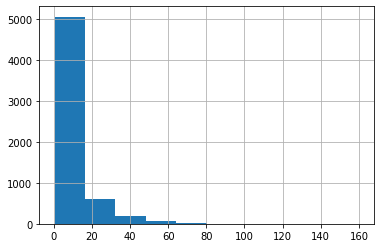

In [124]:
# 구하고자 하는 값인 Price는 왼쪽으로 Skewed
data['Price'].hist()

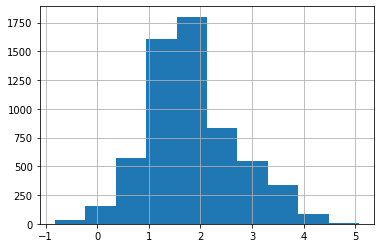

In [125]:
# Price에 log를 취한 열을 새로 생성
# 해당 값은 치우침이 적어짐
data['log_price'] = np.log(data['Price'])
data['log_price'].hist()

In [126]:
# 기존의 price 행을 제거
data.drop('Price', inplace = True, axis=1)

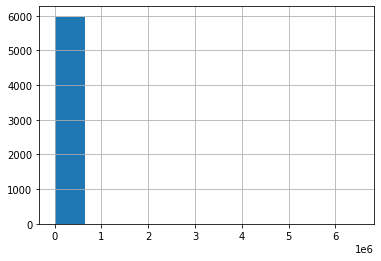

In [127]:
# 주행거리는 왼쪽으로 심하기 치우침
data['Kilometers_Driven'].hist()

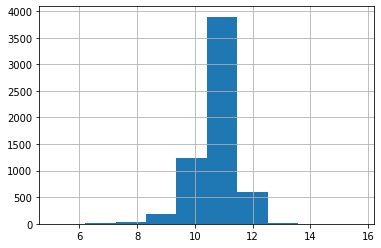

In [128]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])
data['log_Kilometers_Driven'].hist()

In [129]:
data.drop('Kilometers_Driven', inplace = True, axis=1)

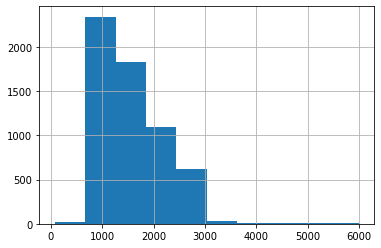

In [130]:
# 역시 왼쪽으로 skewed
data['Engine'].hist()

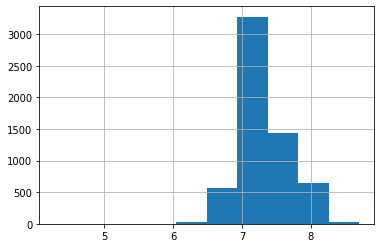

In [131]:
data['log_Engine'] = np.log(data['Engine'])
data['log_Engine'].hist()

In [132]:
data.drop('Engine', inplace = True, axis=1)


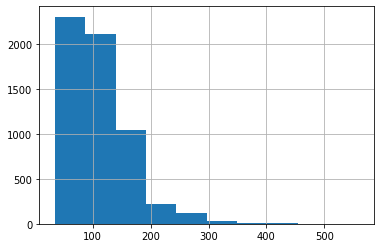

In [133]:
# 왼쪽으로 skewed
data['Power'].hist()

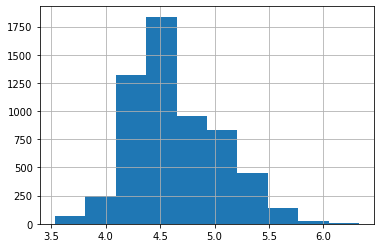

In [134]:
data['log_Power'] = np.log(data['Power'])
data['log_Power'].hist()

In [135]:
data.drop('Power', inplace = True, axis=1)


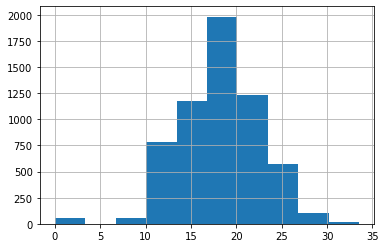

In [136]:
# 치우침 적으므로 변환하지 않음
data['Mileage'].hist()

In [137]:
data.describe()
# 수치형 범수의 경우 그 범위가 비슷해졌다. 

,Year,Mileage,Seats,log_price,log_Kilometers_Driven,log_Engine,log_Power
count,5977.000000,5975.000000,5977.000000,5977.000000,5977.000000,5977.000000,5874.000000
mean,2013.386816,18.179408,5.278735,1.828820,10.756908,7.330939,4.637552
std,3.247017,4.521801,0.808840,0.872434,0.716852,0.340256,0.416526
min,1998.000000,0.000000,0.000000,-0.820981,5.141664,4.276666,3.532226
25%,2012.000000,15.200000,5.000000,1.252763,10.431613,7.088409,4.317488
50%,2014.000000,18.160000,5.000000,1.731656,10.878047,7.308543,4.581902
75%,2016.000000,21.100000,5.000000,2.298577,11.198215,7.592870,4.927978
max,2019.000000,33.540000,10.000000,5.075174,15.687313,8.699181,6.327937


# 범주형 변수 더미 변환

In [138]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner', drop_first=True)
Year_dummy = pd.get_dummies(data['Year'], prefix='Year', drop_first=True)
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat', drop_first=True)
Company_dummy = pd.get_dummies(data['Company'], prefix='Company', drop_first=True)


In [139]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Company_dummy],axis=1)

In [140]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'Company'], axis=1)

In [141]:
num_feature = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_price']

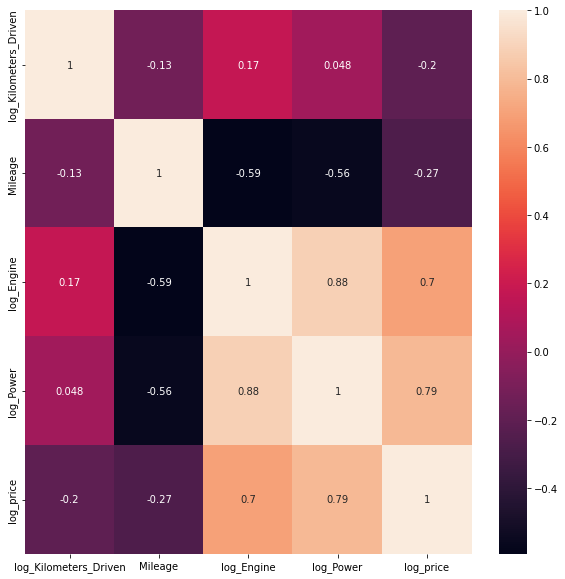

In [142]:
# 각 변수의 상관관계 파악
# 구하고자 하는 변수인 log_price은 log_power, log_engine과 뚜렷한 양의 상관관계가 있음
plt.figure(figsize=(10,10))
sns.heatmap(data = data[num_feature].corr(), annot=True)

# Linear Regression

In [172]:
data = data.dropna()

y = data["log_price"]
x = data.drop(['log_price'], axis=1)


In [157]:
# 전체 데이터를 train과 test용으로 분리한다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)


In [158]:
x.isna().sum()

Mileage                  0
log_Kilometers_Driven    0
log_Engine               0
log_Power                0
Fuel_Diesel              0
                        ..
Company_Smart            0
Company_Tata             0
Company_Toyota           0
Company_Volkswagen       0
Company_Volvo            0
Length: 71, dtype: int64

In [81]:
x_train.head()

,Mileage,log_Kilometers_Driven,log_Engine,log_Power,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
4792,11.50,12.396693,8.000349,5.141664,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2811,17.80,10.561189,7.311218,4.764735,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1660,16.40,10.933107,7.311218,4.356709,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4214,20.00,12.037654,7.243513,4.219508,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1453,17.01,10.481280,7.372118,4.799091,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

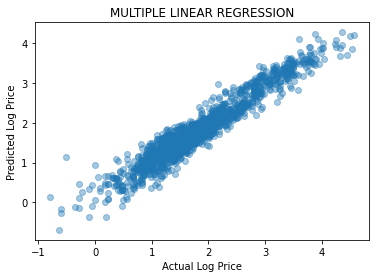

In [166]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [167]:
# 회귀계수 확인
print(model.coef_)

[-1.09025722e-02 -4.41746674e-02  2.44144555e-01  7.61712886e-01
  1.87630591e-01  1.50990331e-14  5.27641234e-02 -3.81334669e-02
 -1.06906080e-01  7.06905823e-02 -5.41844885e-02 -5.34151709e-02
  3.14639988e-01  6.32864518e-01  3.73692702e-01  5.06332809e-01
  5.72423390e-01  6.75291492e-01  5.16951212e-01  8.62979400e-01
  9.73811930e-01  1.04491047e+00  1.15960650e+00  1.28203237e+00
  1.40463969e+00  1.57040686e+00  1.69015067e+00  1.80183658e+00
  1.92720405e+00  2.04768960e+00  2.17133029e+00  2.26608449e+00
  2.22348601e+00  1.23741329e-01 -1.66083845e-02 -1.56642365e-01
  2.20340235e-02  1.46556988e-02  2.26353292e-02 -2.20609474e-01
  2.10793843e-01  1.24110496e-01  1.10718753e-01  9.13605646e-01
 -7.97863982e-01 -8.38888508e-01 -6.94773634e-01 -6.53701602e-01
 -5.39359981e-01 -5.24694112e-01 -4.88436491e-01 -7.69397537e-01
 -6.45435575e-01  2.15580952e-01 -3.52669777e-01  9.06364754e-01
  3.85155764e-01 -7.31047329e-01 -4.41981417e-01  1.41964864e-01
  4.13140800e-01 -3.24209

In [171]:
# 결정계수 확인
print(model.score(x_train, y_train))

# 매우 높게 나타난다.

0.9262735628620704
